In [1]:
pip install numpy matplotlib pandas

  Using cached numpy-2.4.0-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.3 MB 5.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.3 MB 4.1 MB/s eta 0


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР
print('загрузка данных')
df = pd.read_csv('shopping_behavior.csv')

print('размер данных', df.shape)
print('первые строки')
print(df.head())
print('типы данных')
print(df.dtypes)

загрузка данных
размер данных (3900, 18)
первые строки
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

 

In [6]:
# ОБРАБОТКА ДАННЫХ

print('пропуски')
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"дубликаты {duplicates}")

пропуски
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
дубликаты 0


In [11]:
# Основная статистика для числовых колонок
numeric_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
print('числовые колонки')
numeric_stats = df[numeric_columns].describe()
print(numeric_stats.round(2))

for col in numeric_columns:
    print(f'\n{col}')
    print(f'Медиана {df[col].median():.2f}')
    print(f'Среднее {df[col].mean():.2f}')
    print(f'Стандартное отклонение {df[col].std():.2f}')
    print(f'Диапазон [{df[col].min():.2f}, {df[col].max():.2f}]')

# Статистика для категориальных колонок

important_categorical = ['Category', 'Season', 'Payment Method', 'Frequency of Purchases']

for col in important_categorical:
    print(f'{col}')
    value_counts = df[col].value_counts()
    
    # Создаем таблицу со статистикой
    stats_table = pd.DataFrame({
        'Количество': value_counts,
        'Процент': (value_counts / len(df) * 100).round(2)
    })
    
    print(stats_table)
    print(f"  Самое популярное: {value_counts.index[0]} ({value_counts.iloc[0]} раз)")

числовые колонки
           Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.00                3900.00        3900.00             3900.00
mean     44.07                  59.76           3.75               25.35
std      15.21                  23.69           0.72               14.45
min      18.00                  20.00           2.50                1.00
25%      31.00                  39.00           3.10               13.00
50%      44.00                  60.00           3.70               25.00
75%      57.00                  81.00           4.40               38.00
max      70.00                 100.00           5.00               50.00

Age
Медиана 44.00
Среднее 44.07
Стандартное отклонение 15.21
Диапазон [18.00, 70.00]

Purchase Amount (USD)
Медиана 60.00
Среднее 59.76
Стандартное отклонение 23.69
Диапазон [20.00, 100.00]

Review Rating
Медиана 3.70
Среднее 3.75
Стандартное отклонение 0.72
Диапазон [2.50, 5.00]

Previous Purchases
Медиана 25.00
Среднее 25

In [12]:
# Вычисляем корреляционную матрицу
correlation_matrix = df[numeric_columns].corr()

print('Матрица корреляций')
print(correlation_matrix.round(3))


strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_value))
            print(f"{col1} ↔ {col2}: {corr_value:.3f}")

if not strong_correlations:
    print("Сильных корреляций не обнаружено")

Матрица корреляций
                         Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000                 -0.010         -0.022   
Purchase Amount (USD) -0.010                  1.000          0.031   
Review Rating         -0.022                  0.031          1.000   
Previous Purchases     0.040                  0.008          0.004   

                       Previous Purchases  
Age                                 0.040  
Purchase Amount (USD)               0.008  
Review Rating                       0.004  
Previous Purchases                  1.000  
Сильных корреляций не обнаружено


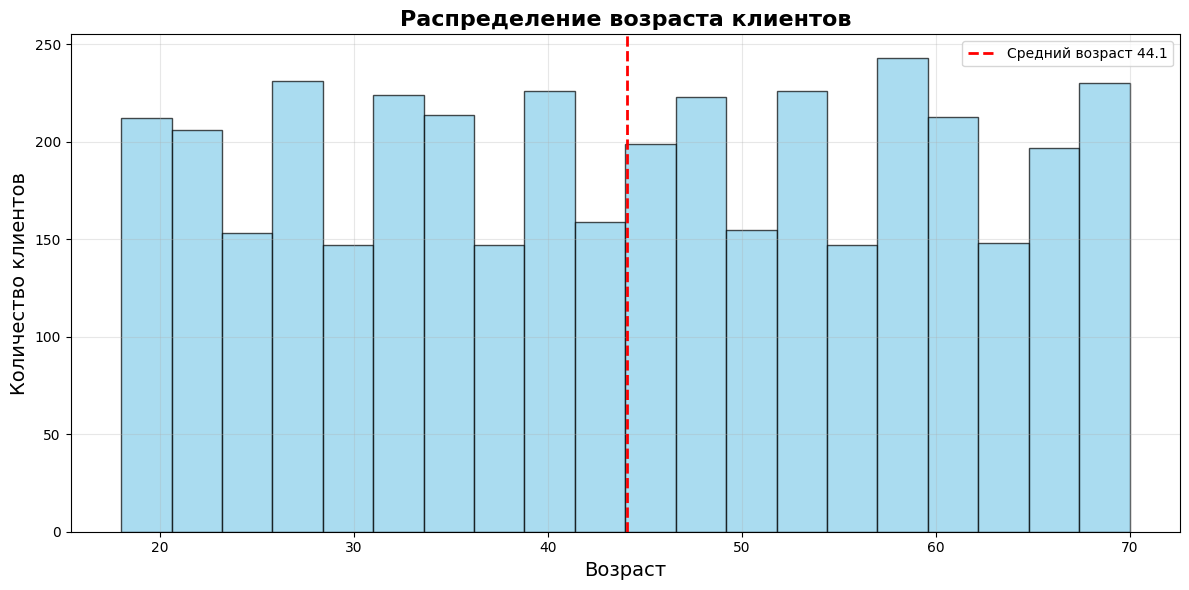

In [14]:
#визуализация данных
#Гистограмма распределения возраста
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов', fontsize=16, fontweight='bold')
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.grid(True, alpha=0.3)

# Добавляем среднюю линию
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, 
            label=f'Средний возраст {mean_age:.1f}')
plt.legend()
plt.tight_layout()
plt.show()

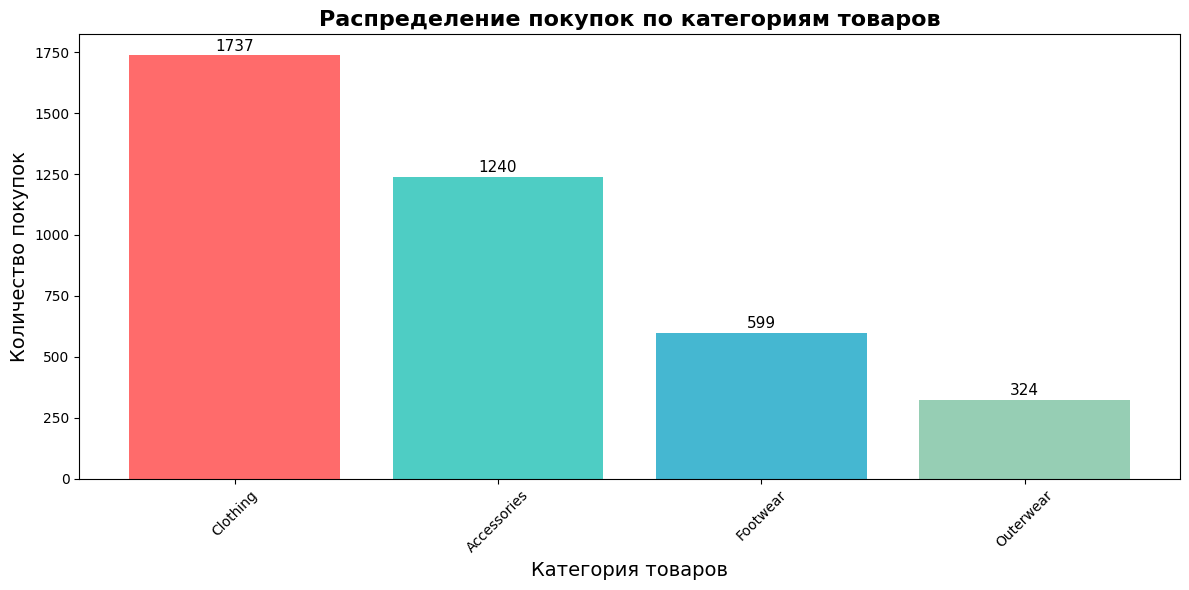

In [15]:
# Столбчатая диаграмма популярности категорий товаров
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = plt.bar(category_counts.index, category_counts.values, color=colors)
plt.title('Распределение покупок по категориям товаров', fontsize=16, fontweight='bold')
plt.xlabel('Категория товаров', fontsize=14)
plt.ylabel('Количество покупок', fontsize=14)
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar, count in zip(bars, category_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(count)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

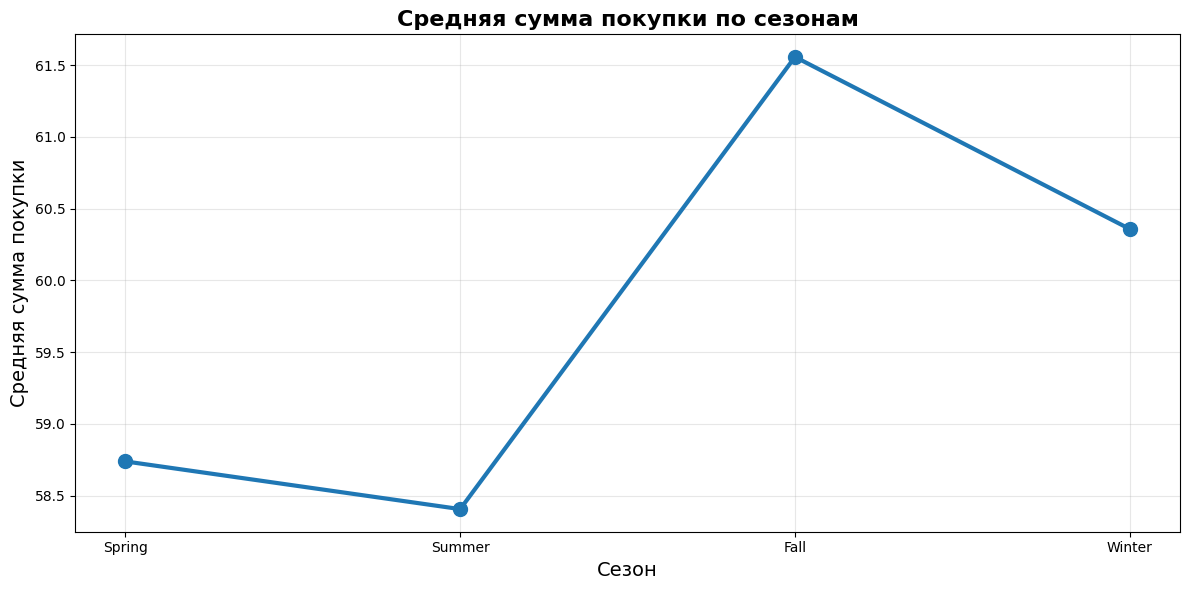

In [19]:
# Линейный график средней суммы покупки по сезонам
plt.figure(figsize=(12, 6))

# Группируем по сезонам и считаем среднюю сумму
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_avg = df.groupby('Season')['Purchase Amount (USD)'].mean().reindex(season_order)

plt.plot(season_avg.index, season_avg.values, marker='o', linewidth=3, 
         markersize=10)
plt.title('Средняя сумма покупки по сезонам', fontsize=16, fontweight='bold')
plt.xlabel('Сезон', fontsize=14)
plt.ylabel('Средняя сумма покупки', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Полина\AppData\Local\Temp\ipykernel_4220\2448047784.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(box_data, labels=categories, patch_artist=True)


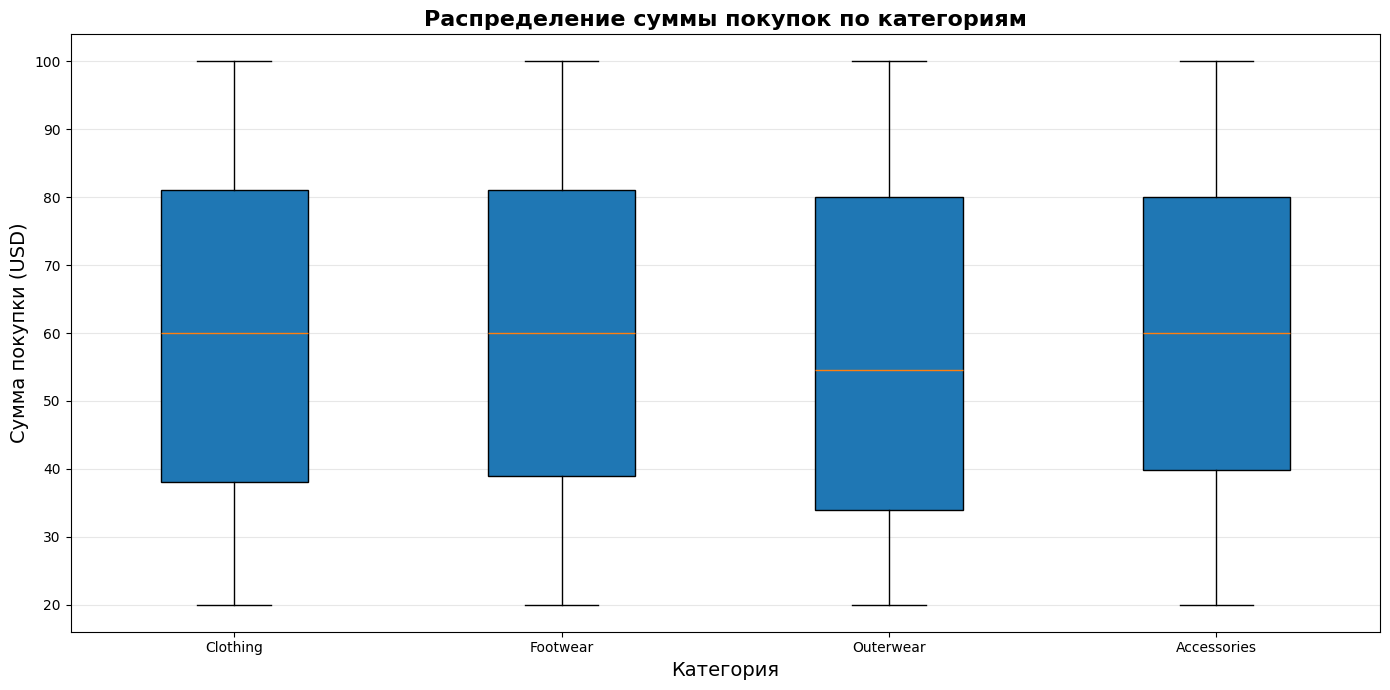

In [24]:
# Boxplot распределения суммы покупок по категориям
plt.figure(figsize=(14, 7))

# Подготовка данных для boxplot
categories = df['Category'].unique()
box_data = []
for category in categories:
    box_data.append(df[df['Category'] == category]['Purchase Amount (USD)'])

box = plt.boxplot(box_data, labels=categories, patch_artist=True)

plt.title('Распределение суммы покупок по категориям', fontsize=16, fontweight='bold')
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Сумма покупки (USD)', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

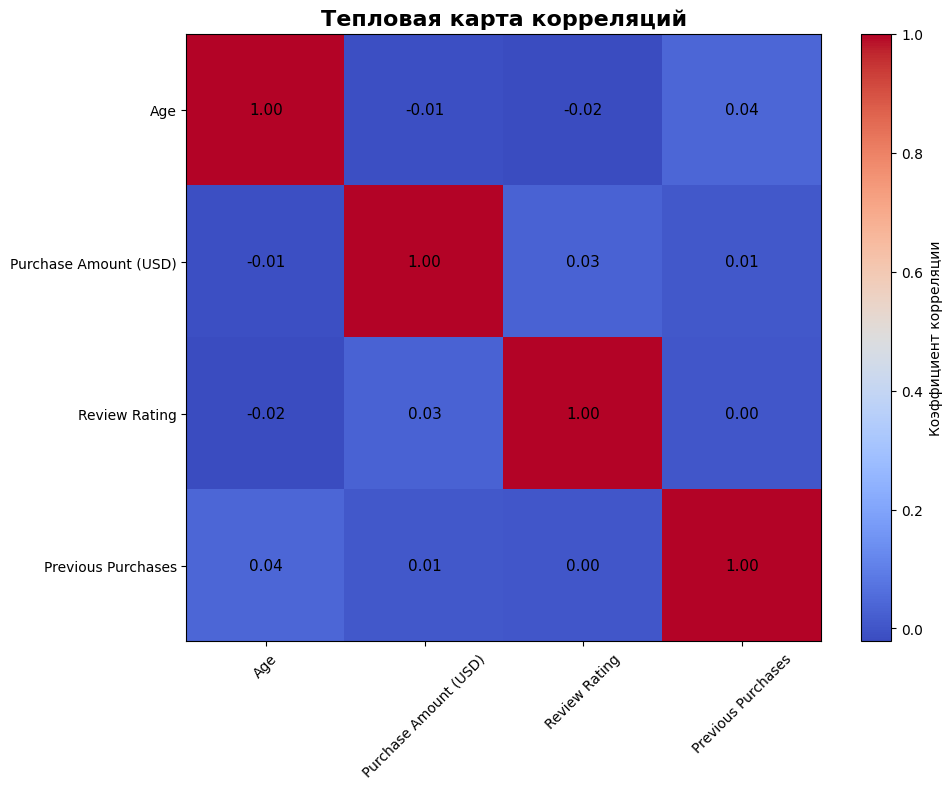

In [25]:
# Heatmap корреляций
plt.figure(figsize=(10, 8))

# Создаем heatmap с помощью imshow
corr_values = correlation_matrix.values
plt.imshow(corr_values, cmap='coolwarm', aspect='auto')

# Добавляем значения в ячейки
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{corr_values[i, j]:.2f}', 
                 ha='center', va='center', color='black', fontsize=11)

# Настройка осей
plt.xticks(range(len(correlation_matrix.columns)), 
           correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), 
           correlation_matrix.columns)

plt.colorbar(label='Коэффициент корреляции')
plt.title('Тепловая карта корреляций', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
#группировки и агрегации
#Создаем возрастные группы
df['Age Group'] = pd.cut(df['Age'], 
                         bins=[18, 25, 35, 45, 55, 65, 70],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-70'])

age_group_stats = df.groupby('Age Group').agg({
    'Purchase Amount (USD)': ['mean', 'median', 'count', 'sum'],
    'Review Rating': 'mean',
    'Previous Purchases': 'mean'
}).round(2)

# Переименовываем колонки для лучшей читаемости
age_group_stats.columns = ['Ср. сумма', 'Медиана суммы', 'Кол-во покупок', 
                          'Общая сумма', 'Ср. рейтинг', 'Ср. пред. покупки']
print(age_group_stats)

           Ср. сумма  Медиана суммы  Кол-во покупок  Общая сумма  Ср. рейтинг  \
Age Group                                                                       
18-25          60.74           61.0             502        30491         3.83   
26-35          59.76           60.0             742        44342         3.74   
36-45          59.31           59.0             729        43234         3.75   
46-55          60.58           62.0             753        45619         3.71   
56-65          59.14           58.5             750        44352         3.75   
66-70          58.88           59.0             355        20904         3.76   

           Ср. пред. покупки  
Age Group                     
18-25                  25.13  
26-35                  24.76  
36-45                  25.17  
46-55                  25.42  
56-65                  26.21  
66-70                  26.15  


C:\Users\Полина\AppData\Local\Temp\ipykernel_4220\311070728.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('Age Group').agg({


In [29]:
# Статистика по категориям товаров

category_stats = df.groupby('Category').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Age': 'mean'
}).round(2)

category_stats.columns = ['Ср. сумма', 'Общая выручка', 'Кол-во покупок', 
                         'Ср. рейтинг', 'Ср. возраст']
print(category_stats)


             Ср. сумма  Общая выручка  Кол-во покупок  Ср. рейтинг  \
Category                                                             
Accessories      59.84          74200            1240         3.77   
Clothing         60.03         104264            1737         3.72   
Footwear         60.26          36093             599         3.79   
Outerwear        57.17          18524             324         3.75   

             Ср. возраст  
Category                  
Accessories        44.22  
Clothing           43.78  
Footwear           44.44  
Outerwear          44.31  


In [30]:
#Анализ по сезонам
season_stats = pd.pivot_table(df, 
                             values=['Purchase Amount (USD)', 'Review Rating'],
                             index='Season',
                             aggfunc=['mean', 'count']).round(2)

# Упрощаем имена колонок
season_stats.columns = ['Ср. сумма', 'Ср. рейтинг', 'Кол-во сумм', 'Кол-во рейтингов']
print(season_stats[['Ср. сумма', 'Ср. рейтинг', 'Кол-во сумм']])


        Ср. сумма  Ср. рейтинг  Кол-во сумм
Season                                     
Fall        61.56         3.73          975
Spring      58.74         3.79          999
Summer      58.41         3.73          955
Winter      60.36         3.75          971


In [31]:
# Анализ методов оплаты
payment_stats = df.groupby('Payment Method').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Age': 'mean'
}).round(2)

payment_stats.columns = ['Ср. сумма', 'Общая сумма', 'Кол-во', 'Ср. рейтинг', 'Ср. возраст']
print(payment_stats)

                Ср. сумма  Общая сумма  Кол-во  Ср. рейтинг  Ср. возраст
Payment Method                                                          
Bank Transfer       59.71        36544     612         3.70        43.86
Cash                59.70        40002     670         3.75        44.08
Credit Card         60.07        40310     671         3.78        44.63
Debit Card          60.92        38742     636         3.76        44.07
PayPal              59.25        40109     677         3.75        44.03
Venmo               58.95        37374     634         3.75        43.69
